# Customer Churn — Exploratory Data Analysis (EDA)

This notebook explores the Telco Customer Churn dataset to understand data quality, feature distributions, and early signals related to customer churn. The goal is to inform feature engineering and model selection.


In [1]:
import sys
sys.executable


'/Users/ladan/MDS/ml_churn_prediction/ml-churn-prediction/venv/bin/python3'

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

## Load dataset

Read the churn dataset and perform an initial inspection to confirm structure and contents.

In [3]:
data_path = "../data/telco_customer_churn.csv"
df = pd.read_csv(data_path)

## Dataset overview

Examine the shape, column names, and data types to identify potential cleaning and preprocessing needs.


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [8]:
df["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Missing values analysis

Check for missing or invalid values that may require imputation or correction.


In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Numerical feature analysis

Inspect numerical features for range, skewness, and potential outliers.


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Categorical feature analysis

Explore categorical variables to identify patterns and potential relationships with churn.


In [11]:
df.describe(include="object")

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## Target variable distribution

Analyze the distribution of the churn label to understand class balance.


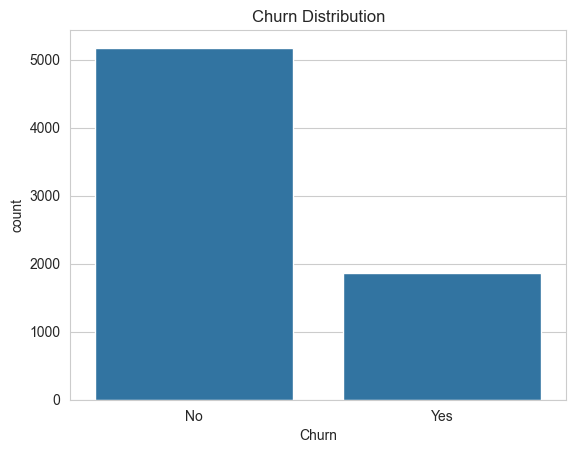

In [12]:
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

In [13]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

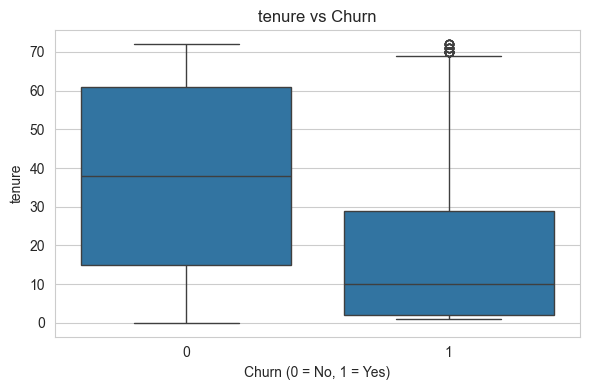

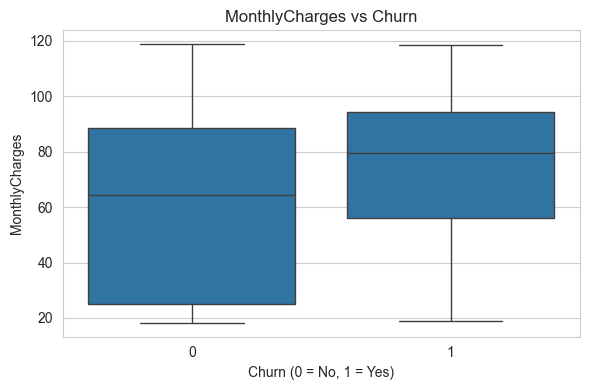

In [14]:
num_features = ["tenure", "MonthlyCharges"]

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="Churn", y=feature, data=df)
    plt.title(f"{feature} vs Churn")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

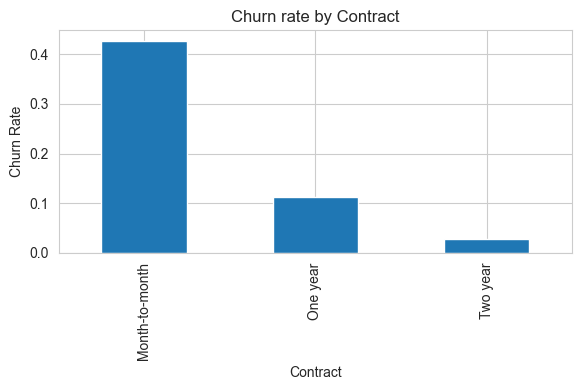

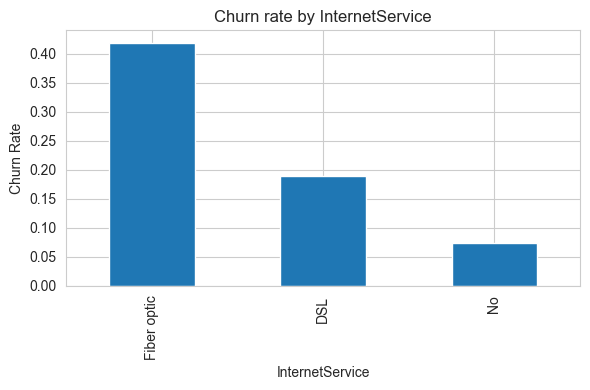

In [15]:
cat_features = ["Contract", "InternetService"]

for feature in cat_features:
    churn_rates = (
        df.groupby(feature)["Churn"]
        .mean()
        .sort_values(ascending=False)
    )

    plt.figure(figsize=(6, 4))
    churn_rates.plot(kind="bar")
    plt.title(f"Churn rate by {feature}")
    plt.ylabel("Churn Rate")
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

### Key observations

- Customers with shorter tenure show higher churn rates.
- Month-to-month contracts are associated with higher churn.
- Higher monthly charges correlate with increased churn risk.
